
<a id="2"></a>
# <p style="background-color:#092327;font-family:newtimeroman;color:#fbfffe;font-size:150%;text-align:center;border-radius:10px 10px; padding:20px;">Evaluating the Ability of Regression Models to Predict Fuel Efficiency of Cars</p>

In [156]:
## image

In this project, I will be predicting the fuel efficiency of cars, using regression models. The capacity to predict the fuel efficiency of cars is valueable given the effect of fuel consumption on global warming as well as air quality in cities. An accurate model could provide insights into which specific features of a car contribute the most to the fuel efficiency of cars, informing decision making in automotive engineering.

The [dataset used in this project](https://www.kaggle.com/datasets/uciml/autompg-dataset) is from the UCI machine learning repository and concerns the city-cycle fuel consumption of cars, with 8 features as follows: (number of cylinders, displacement (engine size), horsepower, weight, acceleration, model year, origin, car name.) There are 398 records.

The main objective of this project is to logically deduce which regression model is most suitable for the prediction of fuel efficiency using this data set, to assess and compare the performance of the selected regression models and highlight any key learnings along the way.

## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px;">Table of Contents</p>

* [Importing Python libraries](#libraries)
* [Loading & Cleaning Data](#load)
* [Exploratory Data Analysis](#EDA)
* [Selection of Regression Models](#selection)
* [Pre-Processing Data](#pre)
* [Baseline Modelling](#baseline)
* [Feature Engineering](#feature)
* [Conclusion](#Conclusions)
* [Future Improvements](#future)

## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px; margin:0;">Importing Python Libraries</p>  <a id=”libraries″></a>

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from statistics import mean

## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px; margin:0;">Loading and Cleaning Data</p>  <a id=”load″></a>


In [139]:
filename = "C:/Users/niall/OneDrive/data/auto-mpg.csv"
data = pd.read_csv(filename)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.00,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.00,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.00,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.00,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.00,3449.0,10.5,70.0,1.0,ford torino


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    float64
 7   origin        398 non-null    float64
 8   car name      398 non-null    object 
dtypes: float64(7), object(2)
memory usage: 28.1+ KB


Some initial adjustments to the data columns...

In [141]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data = data.drop('car name', axis=1)

data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [142]:
data.dropna(axis=0,inplace=True)

* After removing the irrelevant "car name" feature, we have 8 features remaining. 5 are continuous (mpg, displacement, horsepower, weight acceleration) and 3 are multi-value discrete (origin, year, cylinders)
* Miles per gallon (mpg) is the target variable which we are trying to predict.

## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px; margin:0;"> Exploratory Data Analysis (EDA)  </p>  <a id=”EDA″></a>


In [143]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Visualizing Distributions:

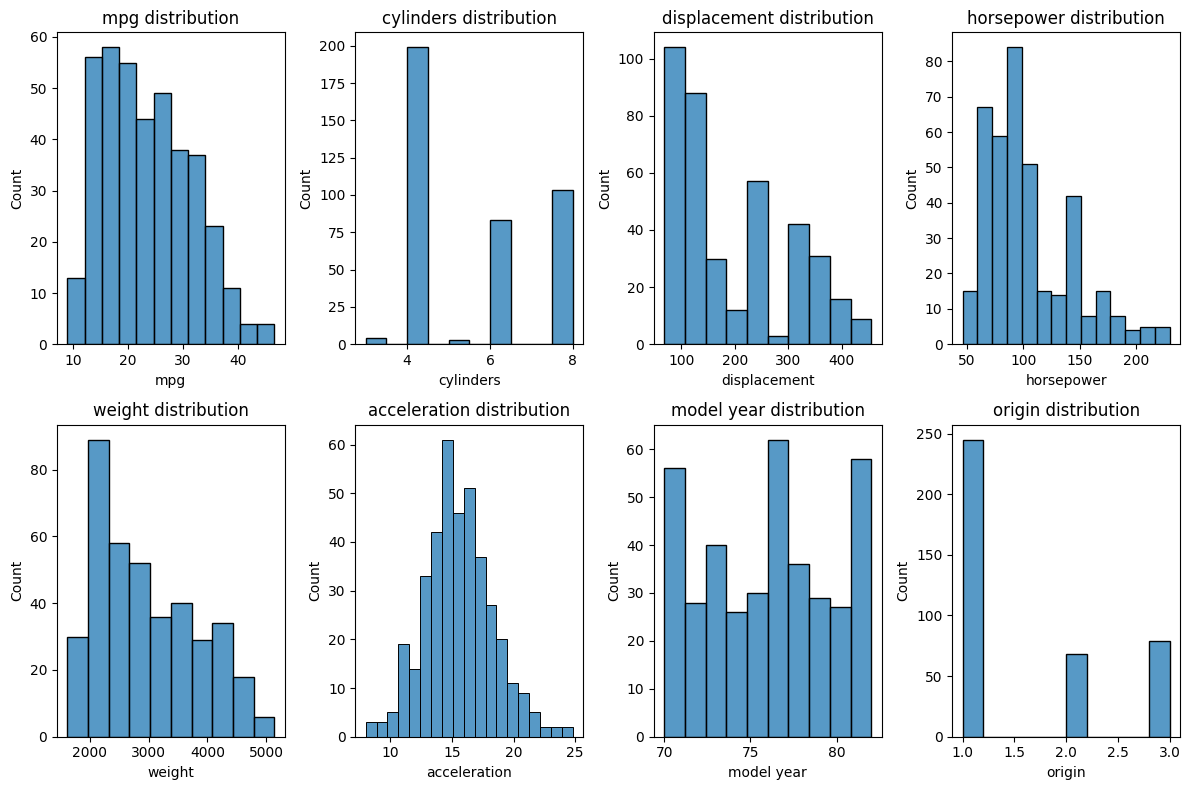

In [144]:
features = data.columns[:]
plt.figure(figsize=(12,8))
i = 0
for feature  in features:
    plt.subplot(2,4,i+1)
    sns.histplot(data[feature])
    plt.title(f"{feature} distribution")
    i+=1
plt.tight_layout()
plt.show()

* Acceleration is the only variable that is normally distributed, all other continuous variables are left skewed.
* There is quite an uneven class representation for the discrete variables

Visualizing continuous variable distributions using boxplots.

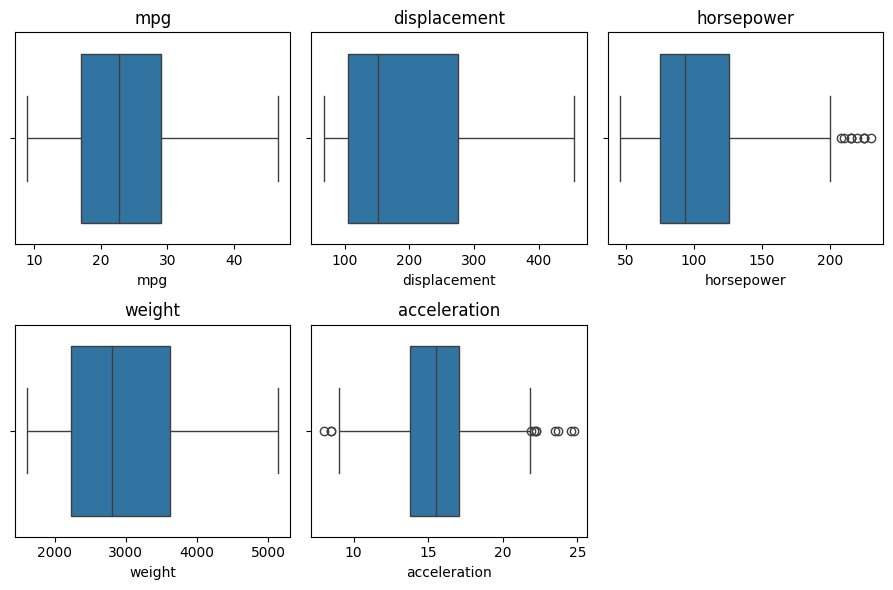

In [145]:
continuous_cols = ["mpg", "displacement", "horsepower", "weight", "acceleration"]

fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 4, figure=fig)


for i in range(3):
    ax = fig.add_subplot(gs[0, i])
    sns.boxplot(x=data[continuous_cols[i]], ax=ax)
    ax.set_title(continuous_cols[i])
for i in range(2):
    ax = fig.add_subplot(gs[1, i])
    sns.boxplot(x=data[continuous_cols[i+3]], ax=ax)
    ax.set_title(continuous_cols[i+3])

plt.tight_layout()
plt.show()


These boxplots indicate that there are a number of outliers in the horsepower and acceleration variables. These outliers may affect the performance of the regressors. I will evaluate the performance of the regressors before and after removing outliers using the following function.

In [146]:
def removeOutliers(data, columns):
    initialLen = len(data)
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
        upper_lim = q3 + (1.5 * iqr)
        lower_lim = q1 - (1.5 * iqr)
        data = data.loc[(data[col] < upper_lim) & (data[col] > lower_lim)]
    print(f"{initialLen-len(data)} rows removed.")
    return data 

In [147]:
data_out = removeOutliers(data, ["horsepower", "acceleration"])

19 rows removed.


Checking Correlations:

<Axes: >

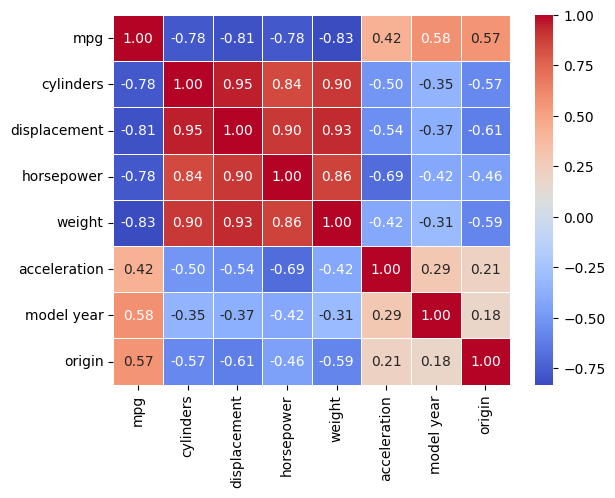

In [148]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidth=.5)

Correlation coefficients >0.7 are often considered highly correlated. Using this metric, there are many highly correlated features in this dataset.

This may create challenges in regression models:
* It may become difficult to differentiate the effects of individual variables on the dependent variable.
* During training, this may cause instability in estimates for regression coefficients, as their variances will increase. Unreliable inferences may follow.
* Some machine learning models may be more capable of dealing with multi-collinearity when compared with others.
* Techniques such as removing highly correlated features or principal component analysis (PCA) are commonly used to deal with this issue


Analysing the relationship between each of the features and the target variable

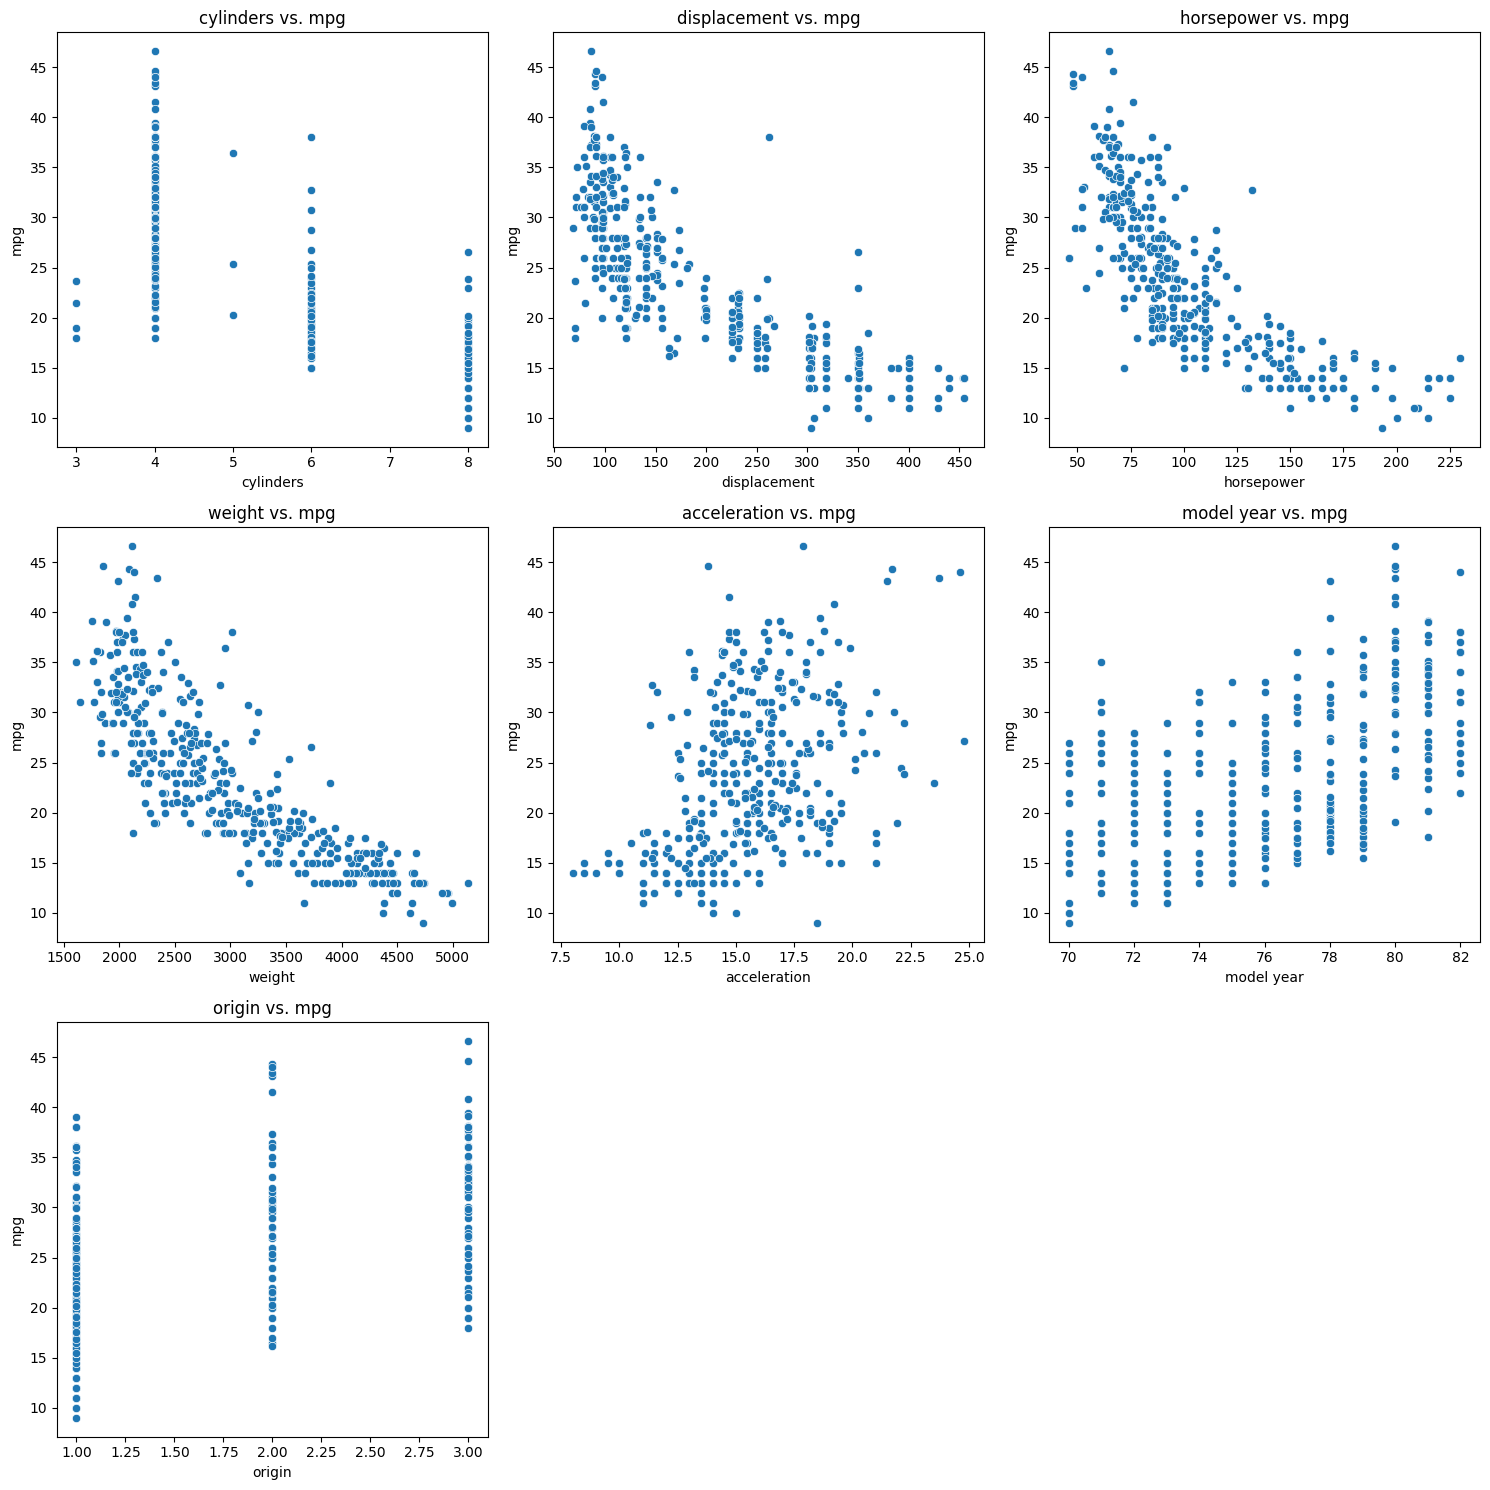

In [149]:
n_features = 7
#setting up subplots
n_cols = 3
n_rows = (num_features + n_cols - 1) // n_cols  # Calculate the number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
# Flatten the axes array to iterate over all subplots
axes = axes.flatten()

# Iterate over each feature and plot it against the target variable
for i, feature in enumerate(data.columns[-7:]):  
    sns.scatterplot(x=data[feature], y=data['mpg'], ax=axes[i])
    axes[i].set_title(f'{feature} vs. mpg')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('mpg')
# Removing empty subplots
for j in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Based on the above plots, there appears to be a moderate degree of non-linearity between the features and the target variable. Particularly for the "acceleration" and "origin" features.

## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px; margin:0;"> Selection of Regression Models  </p>  <a id=”selection″></a>

I will start with linear regression, which uses ordinary least squares, as it is the most basic and interpretable. 

From the EDA, a number of features exhibited multi-collinearity. Ridge Regression is commonly used to deal with this. Ridge regression regularizes the coefficient estimates, which can become inflated and unstable in the event of multi-collinearity. It is expected that this will show an improved performance compared to linear regression.

Also, the EDA showed that there is some degree of non-linearity between the features and the target variable. In this case, the assumptions of the linear models may not be valid. Decision Tree algorithms do not assume linearity between the features and target, will also be selected.

The Random Forest algorithm combines multiple Decision Trees and averages the predictions of individual trees, hence greater accuracy would be expected compared to Decision Trees.

Based on the above logic, **the 4 regression models selected in this analysis will be Linear Regression, Ridge Regression, Decision Tree, and Random Forest.**  

Each model aims to solve a problem associated with the previous model, with an additional expense of computational complexity. The pros and cons of these trade-offs are worth consideration.



In [151]:
def createRegressors():

  linearReg = LinearRegression()
  ridgeReg = Ridge(alpha=1)
  decisionTree = DecisionTreeRegressor(random_state=123)
  randomForest = RandomForestRegressor(random_state=123)
  return ((linearReg,"Linear Regression"),(ridgeReg, "Ridge Regression"),(decisionTree,"Decision Tree"),(randomForest,"Random Forest"))    

## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px; margin:0;"> Pre-Processing Data  </p>  <a id=”pre″></a>

Scaling the data prior to fitting the model is known to prevent feature imbalances, where the algorithm is more affected by one variable compared with another. The strategy depends on the algorithm being used, in fact tree-based algorithms are relatively insensitive to feature scales.

Standard Scaling is often recommended for regression. Here, the features are scaled to have a mean of 0 and roughly unit variance.

For simplicity, I will scale the data prior to cross validation. I will compare performance with and without removal of outliers.

In [150]:
X = data.drop(["mpg"], axis=1)
data.reset_index(inplace=True)
Y = data["mpg"]

scaler= StandardScaler()
X_norm = scaler.fit_transform(X)


X_out = data_out.drop(["mpg"], axis=1)
data_out.reset_index(inplace=True)
Y_out = data_out["mpg"]

scaler= StandardScaler()
X_norm_out = scaler.fit_transform(X_out)

## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px; margin:0;"> Baseline Modelling </p>  <a id=”baseline″></a>

Steps:
* Instantiate k fold cross validation, and createRegressors functions
* Initialize variables to store performance metrics. The R-squared, mean absolute error and feature importance score for each model are being looked at.

In [152]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
models = createRegressors()

def modelling(X, Y):
    modelR2 = []
    modelMAE = []
    modelImp = []
    modelCoeffs_lin = []

    for model, name in models:
        foldR2 = []
        foldMAE = []
        foldImp = []
        foldCoeffs = []
        for train_index, test_index in kf.split(X):
            x_train_fold, x_test_fold = X[train_index], X[test_index]
            y_train_fold, y_test_fold = Y[train_index], Y[test_index]
            model.fit(x_train_fold, y_train_fold)
            y_pred_fold = model.predict(x_test_fold)
            

            #Evaluating
            foldR2.append(r2_score(y_pred_fold, y_test_fold))
            foldMAE.append(mean_absolute_error(y_test_fold, y_pred_fold))

            if hasattr(model, 'feature_importances_'):
                foldImp.append(model.feature_importances_)
            elif hasattr(model, 'coef_'):
                foldCoeffs.append(model.coef_)
            
        modelR2.append(mean(foldR2))
        modelMAE.append(mean(foldMAE))

        if hasattr(model, 'feature_importances_'):
            modelImp.append(sum(foldImp)/len(foldImp))  
        elif hasattr(model, 'coef_'): 
            modelCoeffs_lin.append(sum(foldCoeffs)/len(foldCoeffs))
            
    return [modelR2, modelMAE, modelImp, modelCoeffs_lin] 

Calling the modelling function and storing results for each model in a data frame.

In [153]:
modelR2, modelMAE, modelImp, modelLinCoeffs = modelling(X_norm, Y)
results = pd.DataFrame([modelR2, modelMAE])
results.rename(columns={0: 'Linear Reg.',1: 'Ridge Reg.',2: 'Decision Tree',3: 'Random Forest'}, inplace=True)
results.rename(index={0: 'R-squared',1: 'MAE'}, inplace=True)
results

,Linear Reg.,Ridge Reg.,Decision Tree,Random Forest
R-squared,0.764359,0.763353,0.758865,0.860157
MAE,2.565872,2.560150,2.585276,1.883379


* **The Decision Tree performed the worst out of the 4 models.** This could suggest that the weaknesses in the decision tree, such as overfitting, outweighed its ability to capture non-linear effects.
* **The negligible difference between Ridge and Linear Regression was unexpected**, as there were a number of features that were highly correlated. Perhaps the regularization in the ridge parameter in the model was insufficiently tuned.
* **Random Forest performed significantly better than the other models.** The combination of multiple decision trees may have mitigated their weaknesses when compared to the linear models by prevented overfitting, and  leveraged the strengths, such as handling of multicollinearity and ability to capture non-linear relationships.

The magnitude of improvement with the Random Forest model likely justifies the increased model complexity in this context.

In [154]:
modelR2, modelMAE, modelImp, modelLinCoeffs = modelling(X_norm_out, Y_out)
results_out = pd.DataFrame([modelR2, modelMAE])
results_out.rename(columns={0: 'Linear Reg.',1: 'Ridge Reg.',2: 'Decision Tree',3: 'Random Forest'}, inplace=True)
results_out.rename(index={0: 'R-squared',1: 'MAE'}, inplace=True)
results_out

,Linear Reg.,Ridge Reg.,Decision Tree,Random Forest
R-squared,0.768190,0.767169,0.756291,0.840583
MAE,2.472135,2.470168,2.524744,1.937203


The regression models performed slightly better after outlier removal.

The tree-based models, which are known to be robust to outliers, performed worse. It is possible that this was due to the smaller data set after removal of 19 rows, which was 4.8% of the dataset.

Since the Random Forest Algorithm performed the best, I will keep the "outliers" in the dataset.

## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px; margin:0;"> Feature Engineering </p>  <a id=”feature″></a>

### Analyzing Feature Importances

* In the tree based regressors (Decision Trees, Random Forests), the "feature importance score" attribute from sklearn is influenced by how much each feature contributes to reducing impurity in the tree construction. Since multiple trees are made a random forest, the feature importances are averaged across all trees.
* The mechanism of linear models is completely different and there is no "feature importance" attribute that can be directly compared, however the coefficient values of the fitted model indicate the magnitude and direction of the influence of each feature on the target variable. These coefficients can give a similar insight into the importance of each feature. However given the nature of the models, they assume linearity.

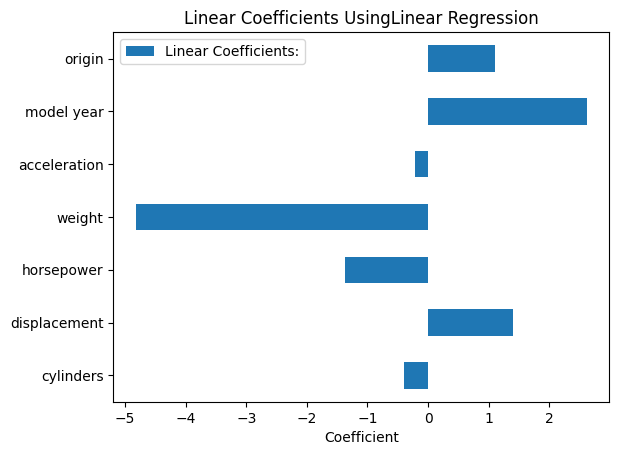

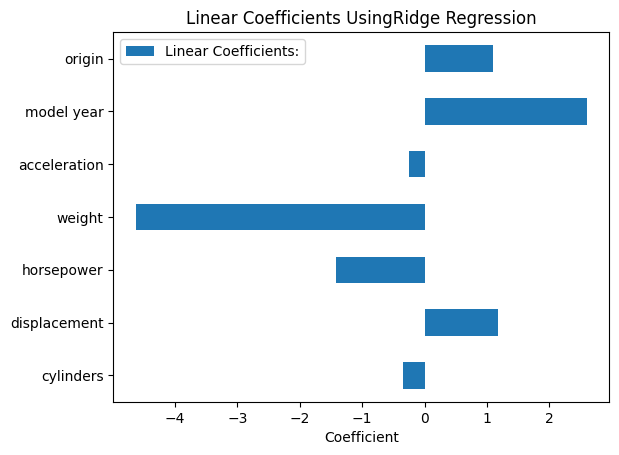

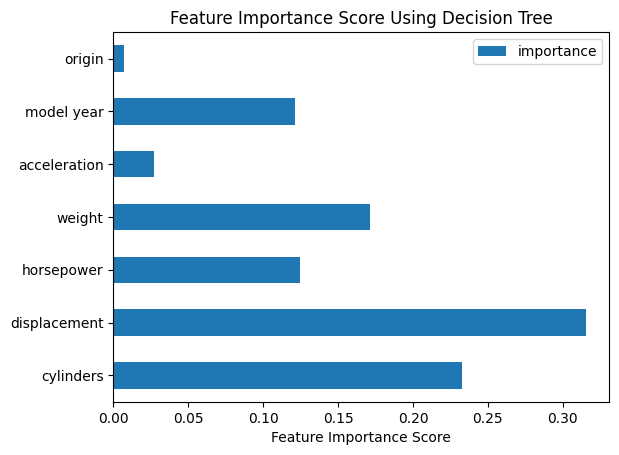

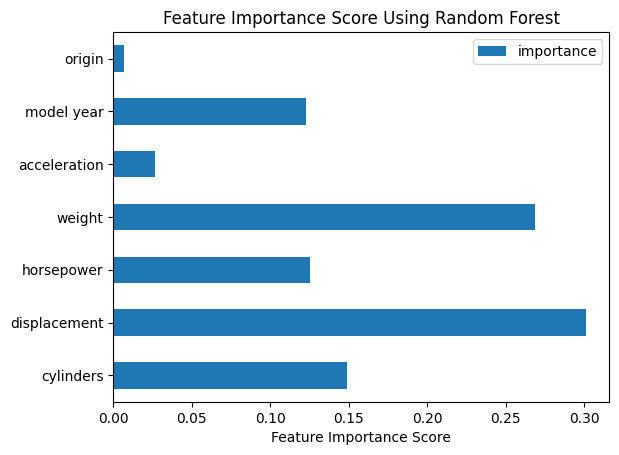

In [155]:
i, j = [0,0]
features = np.concatenate([data.columns[1:]])
print()
for model,name in models:
    if hasattr(model, 'feature_importances_'):
        feat_imp = pd.DataFrame({'importance':modelImp[i]}) 
        feat_imp.index = data.columns[-7:]
        feat_imp.plot.barh(title=f"Feature Importance Score Using {name}")
        plt.xlabel('Feature Importance Score')
        i+=1
    else:
        feat_imp = pd.DataFrame({'Linear Coefficients:':modelLinCoeffs[j]}) 
        feat_imp.index = data.columns[-7:]
        feat_imp.plot.barh(title=f"Linear Coefficients Using{name}")
        plt.xlabel('Coefficient')
        j+=1
    
plt.show()
    

Linear Models:
* weight, model year and displacement had the highest effect on the prediction.

Decision Trees:
* displacement, cylinders, horsepower and model year had the highest importance.

Random Forest:
* Displacement, weight, cylinders, horsepower then model year had the highest importance. Weight and number of cylinders had a significantly higher importance score with the random forest model than decision tree.

The differences between the linear and tree-based models are clearly demonstrated when looking at the feature importances. This is no surprise, given the ability of tree-based models to capture non-linear relationships between features.

The random forest also differed slightly in the order and magnitude of feature importances when compared to the decision tree. Given that the random forest averages over many decision trees, and performed better based on the R-squared and MAE tests, it is assumed that these feature importances are more reliable.

### Removing Redundant Features
Focusing on the random forest, it appears that features such as origin and acceleration had very little importance when compared to the other features. It may be useful to see whether removing these redundant features improves the performance of the model.

In [125]:
X_dropped = np.delete(X_norm, [0,2], axis=1)
modelR2, modelMAE, modelImp, modelLinCoeffs = modelling(X_dropped, Y)
results2 = pd.DataFrame([modelR2, modelMAE])
results2.rename(columns={0: 'Linear Reg.',1: 'Ridge Reg.',2: 'Decision Tree',3: 'Random Forest'}, inplace=True)
results2.rename(index={0: 'R-squared',1: 'MAE'}, inplace=True)

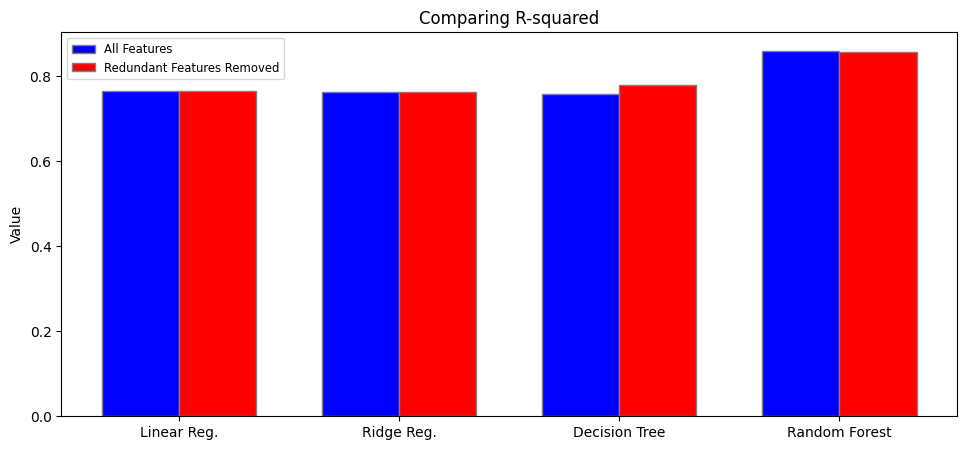

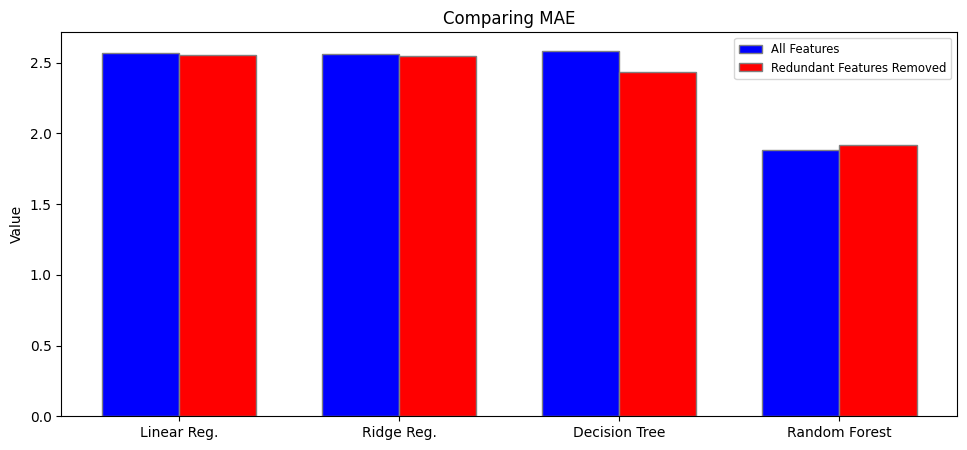

In [126]:
def compareMetric(results, metric):
    bar_width = 0.35
    # Set the x positions for the groups
    r1 = np.arange(4)
    r2 = [x + bar_width for x in r1]
    # Create the figure and the axes
    fig, ax = plt.subplots()
    ax.bar(r1, results[0].iloc[metric], color='blue', width=bar_width, edgecolor='grey', label='All Features')
    ax.bar(r2, results[1].iloc[metric], color='red', width=bar_width, edgecolor='grey', label='Redundant Features Removed')
    # Add labels and title
    ax.set_ylabel('Value')
    ax.set_title(f'Comparing {results[0].index[metric]}')
    ax.set_xticks([r + bar_width / 2 for r in range(results[0].shape[1])])
    ax.set_xticklabels(results[0].columns.tolist())
    ax.legend(fontsize="small")
    plt.subplots_adjust(left=0.1, right=1.5, top=0.9, bottom=0.1)  # Adjust margins as needed

    # Show plot
    plt.show()

compareMetric([results, results2], 0)
compareMetric([results, results2], 1)

From the above plots, it seems that the removal of the 2 redundant features resulted in a slight increase in the performance of the decision tree and a marginal decrease in the performance of the random forest. 

However this marginal decrease in performance may be outweighted by the reduction in computational complexity and increase in stability that may come from removing these features. This reduction in computational complexity  would be beneficial for future hyper-parameter tuning.


## <p style="background-color:#0b5351;font-family:newtimeroman;color:#fbfffe;font-size:125%;text-align:center;border-radius:10px 10px; padding:20px; margin:0;"> Conclusions </p>  <a id=”Conclusions″></a>

From the exploratory data analysis:
* The dataset exhibited high multi-collinearity and moderate skewness.
* The were some outliers in the acceleration and horsepower features.
* Some of the discrete features such as origin and number of cylinders were unequally distributed.
* Non-linearity was identified between some features and the target variable.

k-fold cross validation was performed to train and test linear regression, ridge regression, decision tree and random forest models with default parameters. Random forest performed significantly better than the other three models (R^2 of 0.86), with the decision tree performing the worst (R^2 of 0.759).

Following the removal of 19 outlying rows, the performance of the linear regressors increased marginally, while the performance of the decision trees decreased.

In terms of the most impactful features, results from the linear models differed almost completely when compared to the tree-based models. For the Random Forest, the displacement (engine size), weight and number of cylinders had the highest feature importance scores.

The removal of redundant features had a negligible impact on the performance metrics for the Random Forest.

Some Limitations are as follows:
* For simplicity, the data was scaled prior to cross validation. This could have caused some data leakage.
* The default hyper parameters for the regressors may have been sub-optimal and affected the model performance.

## Future Improvements:

A list of improvements that could be made are as follows:
* Find a fuel efficiency dataset with > 398 samples.
* Deal with skewness in the data.
* Re-consider simplifications such as scaling the data prior to cross validation splitting.
* Try a wider variety of regressors, such as polynomial regression and other ensembles.
* Optimize model hyperparameters.